In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
import os
os.getcwd()

'C:\\Users\\User\\Documents\\Project\\Coding of Classification Binary star on H R Diagram by Machine Learning'

In [207]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [208]:
df =pd.read_csv("E_Type_5_Group.csv", encoding="ISO-8859-1")
df

,P,q,M1,logM1,M2,logM2,R1,logR1,R2,logR2,L1,logL1,L2,logL2,T1,logT1,T2,logT2,E_Type
0,0.316600,0.0787,1.246,0.095518,0.098,-1.008774,1.347,0.129368,0.409,-0.388277,2.5900,0.413300,0.2130,-0.671620,8510.137503,3.929937,2511.217871,3.399884,C
1,0.233700,0.5120,0.750,-0.124939,0.380,-0.420216,0.740,-0.130768,0.550,-0.259637,0.1800,-0.744727,0.1300,-0.886057,3238.633654,3.510362,2573.919862,3.410595,C
2,0.217629,0.6780,0.620,-0.207608,0.420,-0.376751,0.730,-0.136677,0.640,-0.193820,0.1100,-0.958607,0.0240,-1.619789,3812.000000,3.581153,3135.000000,3.496238,C
3,0.296800,0.1720,1.109,0.044932,0.192,-0.716699,1.148,0.059942,0.507,-0.294992,1.4800,0.170262,0.3400,-0.468521,6830.684264,3.834464,3142.690027,3.497302,C
4,0.335200,0.1060,1.442,0.158965,0.155,-0.809668,1.521,0.182129,0.561,-0.251037,2.9240,0.465977,0.4010,-0.396856,9321.521112,3.969487,3445.048673,3.537195,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,11.700000,1.4100,17.630,1.246252,12.500,1.096910,13.400,1.127105,23.500,1.371068,87096.3590,4.940000,38904.5145,4.590000,363479.764200,5.560480,393515.433200,5.594962,SD
12491,8.590000,2.7800,18.100,1.257679,6.500,0.812913,16.800,1.225309,16.800,1.225309,223872.1140,5.350000,83176.3771,4.920000,515326.503900,5.712082,402330.057500,5.604582,SD
12492,4.538000,1.5500,18.300,1.262451,11.800,1.071882,14.700,1.167317,14.700,1.167317,91201.0839,4.960000,204173.7940,5.310000,385111.516200,5.585587,471071.148000,5.673087,SD
12493,5.990000,1.5000,30.000,1.477121,20.000,1.301030,10.000,1.000000,20.000,1.301030,151356.1250,5.180000,288403.1500,5.460000,360518.735000,5.556928,599022.087300,5.777443,SD


In [209]:
len(df)

12495

In [210]:
#เช็ค colums ทั้งหมดของงาน
df.columns

Index(['P', 'q', 'M1', 'logM1', 'M2', 'logM2', 'R1', 'logR1', 'R2', 'logR2',
       'L1', 'logL1', 'L2', 'logL2', 'T1', 'logT1', 'T2', 'logT2', 'E_Type'],
      dtype='object')

In [211]:
#เช็คประเภทของของข้อมูลในแต่ละคอลัมน์
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       12495 non-null  float64
 1   q       12495 non-null  float64
 2   M1      12495 non-null  float64
 3   logM1   12495 non-null  float64
 4   M2      12495 non-null  float64
 5   logM2   12495 non-null  float64
 6   R1      12495 non-null  float64
 7   logR1   12495 non-null  float64
 8   R2      12495 non-null  float64
 9   logR2   12495 non-null  float64
 10  L1      12495 non-null  float64
 11  logL1   12495 non-null  float64
 12  L2      12495 non-null  float64
 13  logL2   12495 non-null  float64
 14  T1      12495 non-null  float64
 15  logT1   12495 non-null  float64
 16  T2      12495 non-null  float64
 17  logT2   12495 non-null  float64
 18  E_Type  12495 non-null  object 
dtypes: float64(18), object(1)
memory usage: 1.8+ MB


In [212]:
#เช็คประภทของดาวคู่ที่พิจารณาจากโรชซ์โมเดล
df.E_Type.value_counts()

SD     5481
D      2495
LTC    2361
C      1248
EC      910
Name: E_Type, dtype: int64

In [213]:
from sklearn.cluster import KMeans

In [214]:
x = df[['P', 'q', 'M1', 'logM1', 'M2', 'logM2', 'R1', 'logR1',
       'R2', 'logR2', 'L1', 'logL1', 'L2', 'logL2', 'T1', 'logT1', 'T2',
       'logT2']]

In [215]:
model = KMeans(n_clusters=5)
model

KMeans(n_clusters=5)

In [216]:
model.fit(x)

KMeans(n_clusters=5)

In [217]:
model.cluster_centers_

array([[ 8.66597870e+00,  3.87049032e-01,  2.27231919e+00,
         2.71645654e-01,  9.70665232e-01, -2.20614660e-01,
         2.29609450e+00,  2.63425518e-01,  2.56002627e+00,
         2.22592155e-01,  4.16147109e+02,  1.01017344e+00,
         1.68078165e+02,  4.54555753e-01,  8.21802562e+03,
         3.88160408e+00,  6.12924430e+03,  3.76479761e+00],
       [ 5.06333333e+00,  2.64333333e+00,  3.43666667e+01,
         1.53498985e+00,  1.33333333e+01,  1.11738774e+00,
         1.75333333e+01,  1.21454376e+00,  1.35333333e+01,
         1.12945293e+00,  1.38604022e+06,  6.12460950e+00,
         3.61144634e+04,  4.45837708e+00,  8.16653595e+05,
         5.90035210e+00,  2.79412271e+05,  5.44124857e+00],
       [ 4.82341176e+00,  1.86882353e+00,  1.94541176e+01,
         1.27669865e+00,  1.09188235e+01,  1.00853732e+00,
         1.12700000e+01,  1.02540275e+00,  1.27241176e+01,
         1.06085934e+00,  1.21665541e+05,  4.98895789e+00,
         8.21381694e+04,  4.66533926e+00,  3.49204035e

In [218]:
model.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [219]:
df['E_Type'].values

array(['C', 'C', 'C', ..., 'SD', 'SD', 'SD'], dtype=object)

In [220]:
#แบ่งประเภทไปสู่คลัสเตอร์
pd.crosstab((df['E_Type']),model.labels_)

col_0,0,1,2,3,4
E_Type,,,,,
C,1248,0,0,0,0
D,2479,0,0,12,4
EC,884,0,0,22,4
LTC,2361,0,0,0,0
SD,5446,3,17,12,3


In [221]:
x = df.iloc[:,3:5].values

In [222]:
x

array([[ 0.09551804,  0.098     ],
       [-0.12493874,  0.38      ],
       [-0.20760831,  0.42      ],
       ...,
       [ 1.26245109, 11.8       ],
       [ 1.47712125, 20.        ],
       [ 1.462398  , 13.        ]])

In [223]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [224]:
wcss

[58940.310814926284,
 19497.598577335226,
 10956.579643416486,
 7040.503864402776,
 4585.882933281953,
 3592.7795121907056,
 2744.304471624814,
 2040.5665815262305,
 1581.1766640103626,
 1280.636581333483]

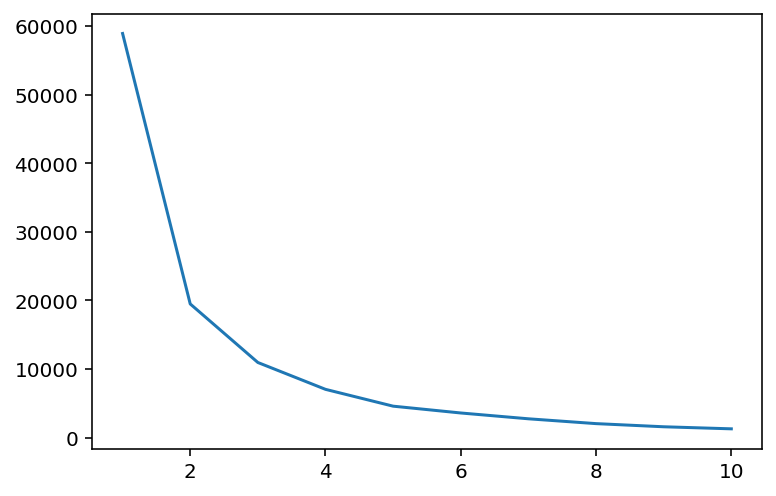

In [225]:
plt.plot(range(1,11),wcss)

In [226]:
kmeans = KMeans(n_clusters=5,init='k-means++')
y_means = kmeans.fit_predict(x)

In [227]:
y_means

array([0, 0, 0, ..., 4, 4, 4])

In [228]:
pd.concat([df,pd.DataFrame(y_means)],axis=1)

,P,q,M1,logM1,M2,logM2,R1,logR1,R2,logR2,L1,logL1,L2,logL2,T1,logT1,T2,logT2,E_Type,0
0,0.316600,0.0787,1.246,0.095518,0.098,-1.008774,1.347,0.129368,0.409,-0.388277,2.5900,0.413300,0.2130,-0.671620,8510.137503,3.929937,2511.217871,3.399884,C,0
1,0.233700,0.5120,0.750,-0.124939,0.380,-0.420216,0.740,-0.130768,0.550,-0.259637,0.1800,-0.744727,0.1300,-0.886057,3238.633654,3.510362,2573.919862,3.410595,C,0
2,0.217629,0.6780,0.620,-0.207608,0.420,-0.376751,0.730,-0.136677,0.640,-0.193820,0.1100,-0.958607,0.0240,-1.619789,3812.000000,3.581153,3135.000000,3.496238,C,0
3,0.296800,0.1720,1.109,0.044932,0.192,-0.716699,1.148,0.059942,0.507,-0.294992,1.4800,0.170262,0.3400,-0.468521,6830.684264,3.834464,3142.690027,3.497302,C,0
4,0.335200,0.1060,1.442,0.158965,0.155,-0.809668,1.521,0.182129,0.561,-0.251037,2.9240,0.465977,0.4010,-0.396856,9321.521112,3.969487,3445.048673,3.537195,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,11.700000,1.4100,17.630,1.246252,12.500,1.096910,13.400,1.127105,23.500,1.371068,87096.3590,4.940000,38904.5145,4.590000,363479.764200,5.560480,393515.433200,5.594962,SD,4
12491,8.590000,2.7800,18.100,1.257679,6.500,0.812913,16.800,1.225309,16.800,1.225309,223872.1140,5.350000,83176.3771,4.920000,515326.503900,5.712082,402330.057500,5.604582,SD,1
12492,4.538000,1.5500,18.300,1.262451,11.800,1.071882,14.700,1.167317,14.700,1.167317,91201.0839,4.960000,204173.7940,5.310000,385111.516200,5.585587,471071.148000,5.673087,SD,4
12493,5.990000,1.5000,30.000,1.477121,20.000,1.301030,10.000,1.000000,20.000,1.301030,151356.1250,5.180000,288403.1500,5.460000,360518.735000,5.556928,599022.087300,5.777443,SD,4


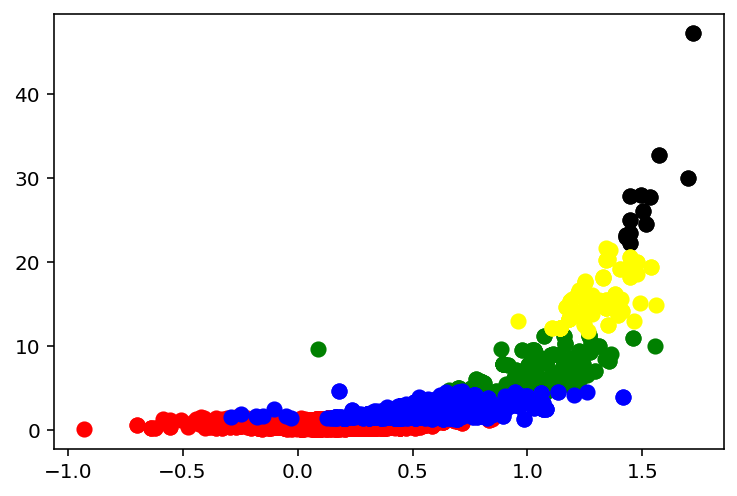

In [229]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=50,c='red')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=50,c='green')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=50,c='black')
plt.scatter(x[y_means==3,0], x[y_means==3,1], s=50,c='blue')
plt.scatter(x[y_means==4,0], x[y_means==4,1], s=50,c='yellow')

